In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def gray(path , WIDTH , HEIGHT ):
    masked = cv2.imread(path)
    masked = cv2.resize(masked , (WIDTH, HEIGHT))
    masked_gray = cv2.cvtColor(masked, cv2.COLOR_BGR2GRAY)
    ret, masked_thr = cv2.threshold(masked_gray, 128, 255, cv2.THRESH_BINARY)
    return masked_thr

In [20]:
def get_IoU(grd_path, masked_path, WIDTH, HEIGHT):
    grd_truth_thr = gray(grd_path,WIDTH,HEIGHT)
    masked_thr = gray(masked_path,WIDTH,HEIGHT)
    intersection = cv2.countNonZero(cv2.bitwise_and(grd_truth_thr, masked_thr))
    union = cv2.countNonZero(cv2.bitwise_or(grd_truth_thr,masked_thr))
    
    return intersection / union

In [34]:
#IoU = intersection / union
#print(intersection, union, IoU)

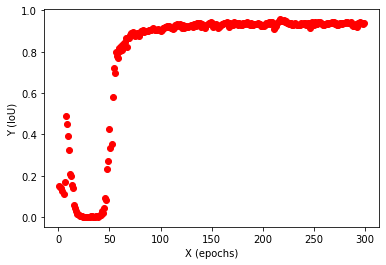

In [38]:
X=[]
for i in range(1,300):    
    IoU = get_IoU ('data/target/target002.jpg', f'300img/{i}.jpg', 512, 512)
    plt.plot(i,IoU,'or')
    X.append(IoU)
plt.xlabel('X (epochs)')
plt.ylabel('Y (IoU)')
plt.show()

In [45]:
print(X.index(max(X)), ',',max(X))

216 , 0.9567676660381867
